In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import skimage
from PIL import Image
import cv2
import os
import glymur
from skimage.measure import compare_ssim,compare_psnr

In [2]:
def show_data(x_in, pre_in):
    mean = np.mean(x_in)
    std = np.std(x_in)
    Max = np.max(x_in)
    Min = np.min(x_in)
    dtype = x_in.dtype
    
    print(pre_in + ' shape: ' + str(x_in.shape) + ' , type: ' + str(dtype) + ' , mean = ' + str(mean) 
          + ' , std = ' + str(std) + ' , Max = ' + str(Max) + ' , Min = ' + str(Min))

In [3]:
def trans_JP2k(data_in, comp_r):
    tmpu8=data_in.astype(np.uint8)
    jp2 = glymur.Jp2k('./test_jp_file.jp2', data=tmpu8, cratios=[comp_r,comp_r-0.0001,comp_r-0.00011])
    size=os.path.getsize("./test_jp_file.jp2")
    #jp2.layer = 0
    rd=jp2[:]
    rdu8=rd.astype(np.uint8)
    return rdu8, size

In [4]:
def kd_fname(i_in):
    rname = '/IMG000' + str(i_in) + '.dib'
    if i_in >9: rname = '/IMG00' + str(i_in) + '.dib'
        
    return rname

In [5]:
def read_KD_img(pref, i_img):
    fname = pref + kd_fname(i_img) 
    tim = cv2.imread(fname)
    npix = tim.shape[0]*tim.shape[1]
    assert(npix == 2048*3072)
    if tim.shape[0]!=2048: tim = np.rot90(tim,k=1)
        
    data_o = np.zeros([2048,3072,3])
    data_o[...,0] = tim[...,2]
    data_o[...,1] = tim[...,1]
    data_o[...,2] = tim[...,0]
    data_o=data_o.astype(np.uint8)
    
    return data_o

In [6]:
def compare_metrics(data0,data1): #data0: label
    #size = len(data0.flatten())*8
    psnr =compare_psnr(data1, data0)
    ssim =compare_ssim(data1, data0, multichannel=True)
    return psnr, ssim

In [7]:
def compare_concise(pref, idx, comp_r):
    img_o = read_KD_img(pref, idx)
    show_data(img_o, '  img_o')
    
    img_j, size_j = trans_JP2k(img_o, comp_r)
    show_data(img_j, '  img_j')
    print('size_j= ' + str(size_j))
    
    psnr, ssim = compare_metrics(img_o,img_j)
    size_o = len(img_o.flatten())
    ratio = float(size_o)/float(size_j)

    print('  psnr= ' + str(psnr) + ' ; ssim= ' + str(ssim))
    print('  size_o= ' + str(size_o))
    print('  ratio= ' + str(ratio))
    
    plt.figure(figsize=(16, 18))

    plt.subplot(1,2,1)
    plt.imshow(img_o)
    
    plt.subplot(1,2,2)    
    plt.imshow(img_j)
    plt.title('PSNR= %.2f, SSIM= %.4f'%(psnr,ssim))
    plt.show()

In [8]:
pref = '../Kodak_examples_uncompressed'

## 1

  img_o shape: (2048, 3072, 3) , type: uint8 , mean = 106.24156596925523 , std = 55.50128436770011 , Max = 255 , Min = 0
  img_j shape: (2048, 3072, 3) , type: uint8 , mean = 106.806090037028 , std = 55.59728282086252 , Max = 255 , Min = 0
size_j= 295111
  psnr= 37.18660203275074 ; ssim= 0.9144126484139821
  size_o= 18874368
  ratio= 63.95684335724524


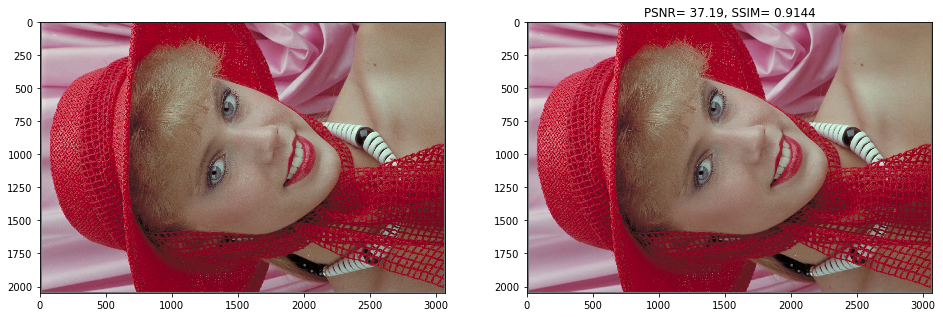

In [9]:
compare_concise(pref, 1, 64)

In [10]:
ratio_ar = 64/((0.68778+0.73436+0.6531)/3)
print('ratio_ar= ' + str(ratio_ar))

ratio_ar= 92.51941944064302


  img_o shape: (2048, 3072, 3) , type: uint8 , mean = 106.24156596925523 , std = 55.50128436770011 , Max = 255 , Min = 0
  img_j shape: (2048, 3072, 3) , type: uint8 , mean = 107.00313017103407 , std = 55.589701162930005 , Max = 255 , Min = 0
size_j= 203191
  psnr= 36.1093126391751 ; ssim= 0.8985186701736964
  size_o= 18874368
  ratio= 92.88978350419063


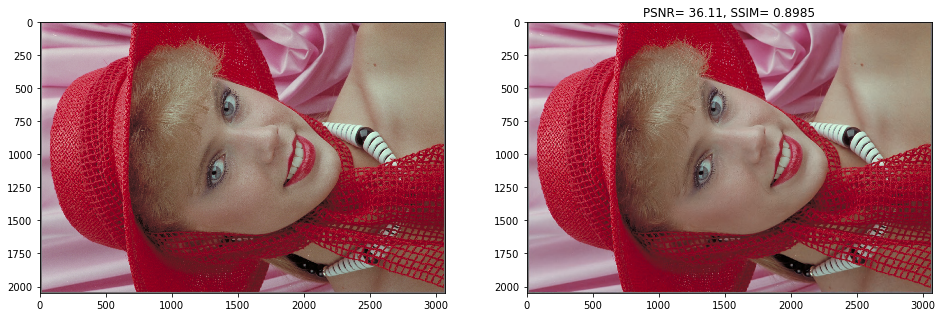

In [11]:
compare_concise(pref, 1, 93)

## 2

  img_o shape: (2048, 3072, 3) , type: uint8 , mean = 119.15903176201715 , std = 45.98507624016484 , Max = 255 , Min = 0
  img_j shape: (2048, 3072, 3) , type: uint8 , mean = 119.58663421207004 , std = 45.94865403552327 , Max = 255 , Min = 0
size_j= 295022
  psnr= 35.82283119561361 ; ssim= 0.8957100118347633
  size_o= 18874368
  ratio= 63.97613737280609


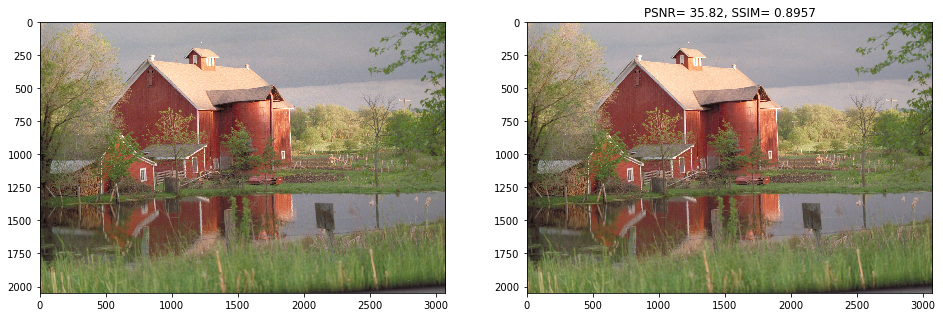

In [12]:
compare_concise(pref, 2, 64)

In [13]:
ratio_ar = 64/((0.67357+0.69667+0.69638)/3)
print('ratio_ar= ' + str(ratio_ar))

ratio_ar= 92.90532366859897


  img_o shape: (2048, 3072, 3) , type: uint8 , mean = 119.15903176201715 , std = 45.98507624016484 , Max = 255 , Min = 0
  img_j shape: (2048, 3072, 3) , type: uint8 , mean = 119.80930868784587 , std = 46.071354468623625 , Max = 255 , Min = 0
size_j= 203069
  psnr= 34.69069430113334 ; ssim= 0.8754941708232407
  size_o= 18874368
  ratio= 92.94558992263714


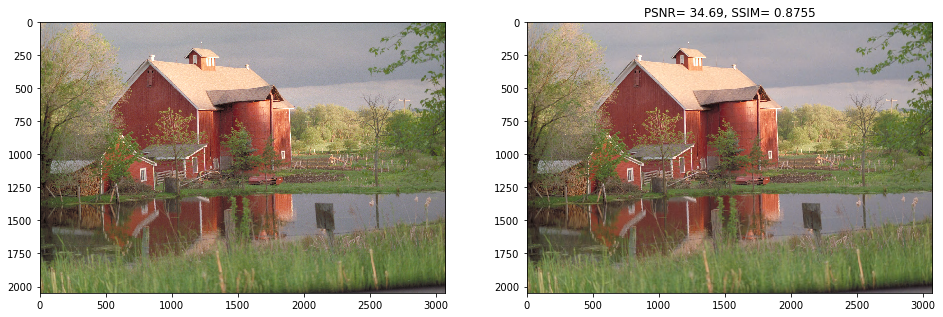

In [14]:
compare_concise(pref, 2, 93)

## 3

  img_o shape: (2048, 3072, 3) , type: uint8 , mean = 108.70627980762058 , std = 55.755080567965834 , Max = 255 , Min = 0
  img_j shape: (2048, 3072, 3) , type: uint8 , mean = 109.26172934638129 , std = 55.67262900248583 , Max = 255 , Min = 0
size_j= 295116
  psnr= 39.42077299382008 ; ssim= 0.9295474667281441
  size_o= 18874368
  ratio= 63.95575976903997


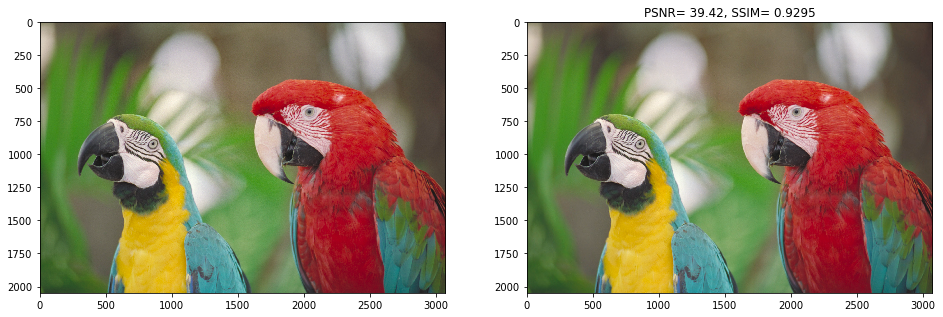

In [15]:
compare_concise(pref, 3, 64)

In [16]:
ratio_ar = 64/((0.6922+0.7463+0.72654)/3)
print('ratio_ar= ' + str(ratio_ar))

ratio_ar= 88.68196430550937


  img_o shape: (2048, 3072, 3) , type: uint8 , mean = 108.70627980762058 , std = 55.755080567965834 , Max = 255 , Min = 0
  img_j shape: (2048, 3072, 3) , type: uint8 , mean = 109.34530284669664 , std = 55.68210227027081 , Max = 255 , Min = 0
size_j= 212119
  psnr= 38.81437672091475 ; ssim= 0.9224129822337442
  size_o= 18874368
  ratio= 88.98009136380993


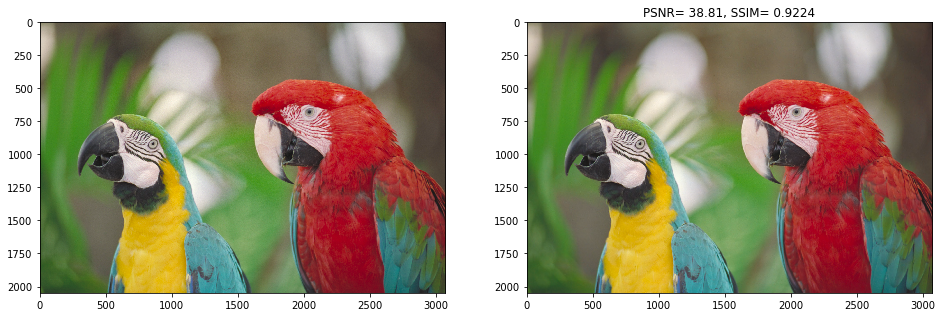

In [17]:
compare_concise(pref, 3, 89)